## Loading Data

### First : We load necessary  libraries 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score,KFold


In [0]:
from sklearn.model_selection import GridSearchCV, train_test_split 
from xgboost import XGBClassifier
from sklearn.metrics import r2_score , roc_auc_score , accuracy_score



In [0]:
from scipy import stats

In [0]:
from scipy.stats import ttest_ind

### Then we load data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### we load names 

In [0]:
names=list(pd.read_csv('/content/drive/My Drive/b5c536467c30d66ab97cd1f5c9a3497d-5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt',header=None)[0])

In [8]:
names

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

#### then load data , making sure that thefirst row is not the header , and instead header is the columnsnames intheother txt file  

In [0]:
data = pd.read_csv('/content/drive/My Drive/b5c536467c30d66ab97cd1f5c9a3497d-5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv',header=None, names=names)

In [10]:
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


then we make 'ID' columns as index of the data 

In [0]:
data.index=data['ID']

## Exploratory Analysis

### Feature Engineering , and validating assumptions for modeling 


#### we first check for missing values and data types 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean        

##### it is clear that no columns contains missing data , also all columns have the correct data type  

#### we then check , explore our dependent (predicted) variable, distribution

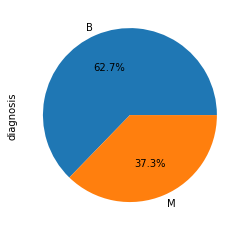

In [13]:
np.round((data.diagnosis.value_counts()*100 / data.diagnosis.count()),2).plot(kind='pie',autopct='%1.1f%%')

#### let's check features of predictors , their distribution and their describtive statistics 

In [0]:
predictors = []

for i in data.columns:
  if data.dtypes[i] == 'float64' :
    predictors.append(i)
  else :
    continue

distribution of  radius_mean
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64


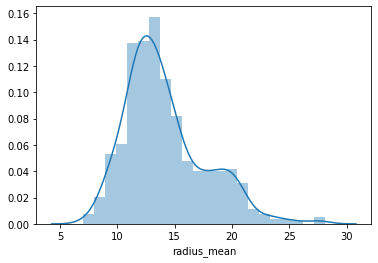

distribution of  radius_sd_error
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: radius_sd_error, dtype: float64


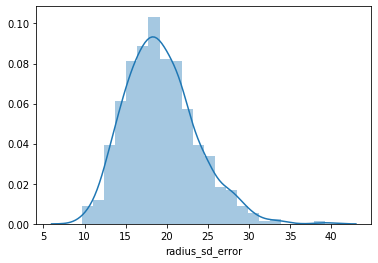

distribution of  radius_worst
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: radius_worst, dtype: float64


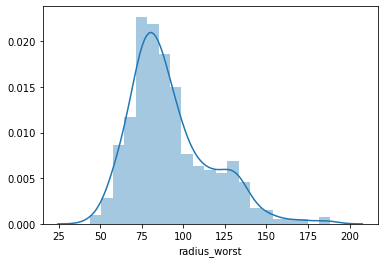

distribution of  texture_mean
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: texture_mean, dtype: float64


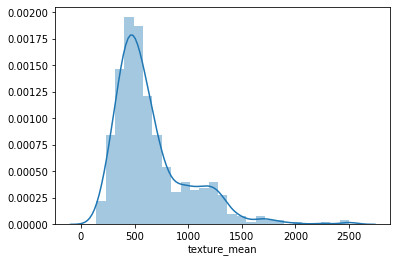

distribution of  texture_sd_error
count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: texture_sd_error, dtype: float64


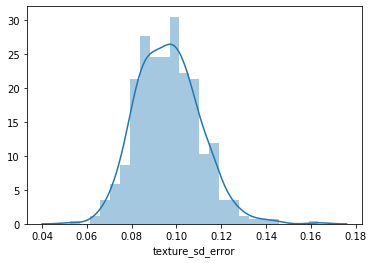

distribution of  texture_worst
count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: texture_worst, dtype: float64


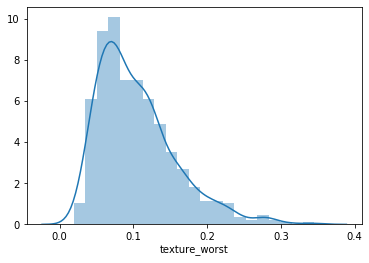

distribution of  perimeter_mean
count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: perimeter_mean, dtype: float64


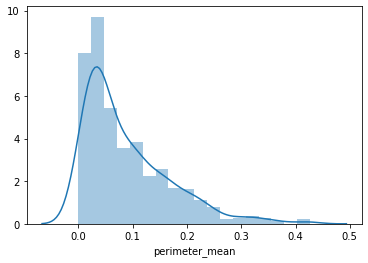

distribution of  perimeter_sd_error
count    569.000000
mean       0.048919
std        0.038803
min        0.000000
25%        0.020310
50%        0.033500
75%        0.074000
max        0.201200
Name: perimeter_sd_error, dtype: float64


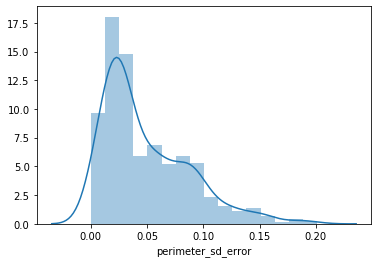

distribution of  perimeter_worst
count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: perimeter_worst, dtype: float64


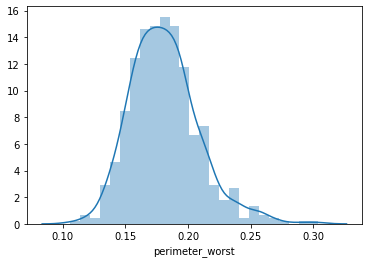

distribution of  area_mean
count    569.000000
mean       0.062798
std        0.007060
min        0.049960
25%        0.057700
50%        0.061540
75%        0.066120
max        0.097440
Name: area_mean, dtype: float64


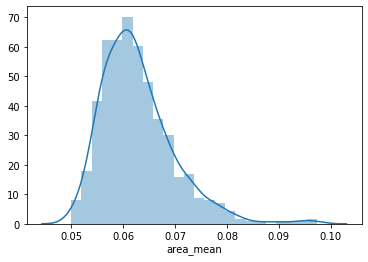

distribution of  area_sd_error
count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: area_sd_error, dtype: float64


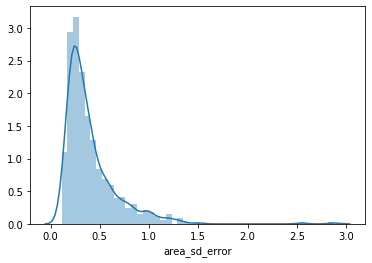

distribution of  area_worst
count    569.000000
mean       1.216853
std        0.551648
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        4.885000
Name: area_worst, dtype: float64


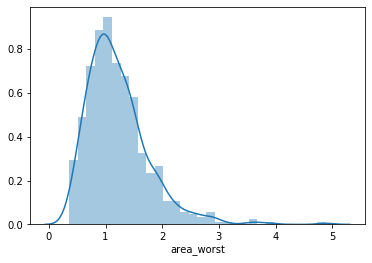

distribution of  smoothness_mean
count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: smoothness_mean, dtype: float64


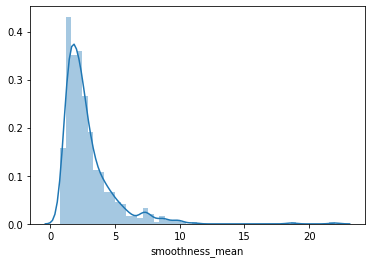

distribution of  smoothness_sd_error
count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: smoothness_sd_error, dtype: float64


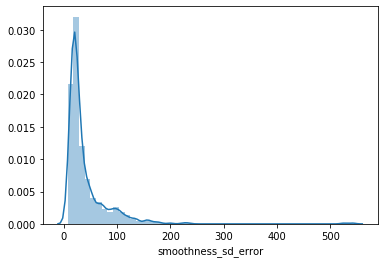

distribution of  smoothness_worst
count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness_worst, dtype: float64


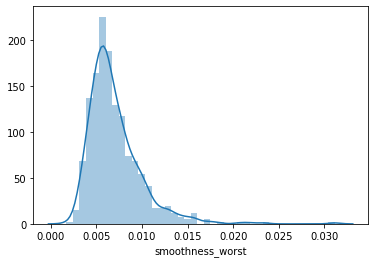

distribution of  compactness_mean
count    569.000000
mean       0.025478
std        0.017908
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.135400
Name: compactness_mean, dtype: float64


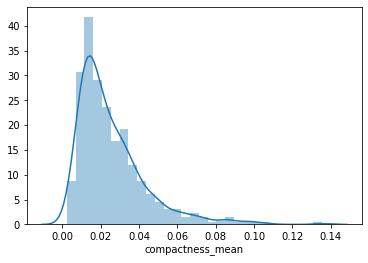

distribution of  compactness_sd_error
count    569.000000
mean       0.031894
std        0.030186
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.396000
Name: compactness_sd_error, dtype: float64


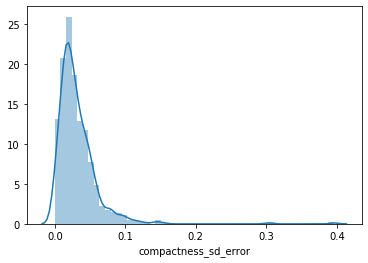

distribution of  compactness_worst
count    569.000000
mean       0.011796
std        0.006170
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.052790
Name: compactness_worst, dtype: float64


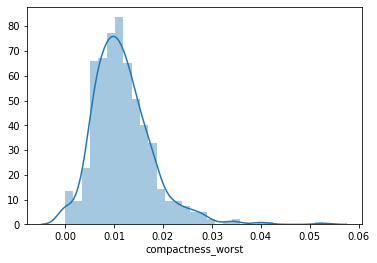

distribution of  concavity_mean
count    569.000000
mean       0.020542
std        0.008266
min        0.007882
25%        0.015160
50%        0.018730
75%        0.023480
max        0.078950
Name: concavity_mean, dtype: float64


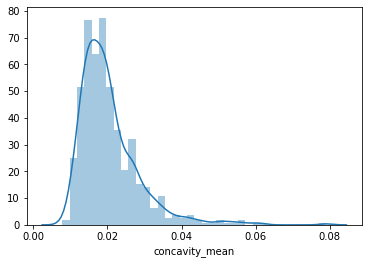

distribution of  concavity_sd_error
count    569.000000
mean       0.003795
std        0.002646
min        0.000895
25%        0.002248
50%        0.003187
75%        0.004558
max        0.029840
Name: concavity_sd_error, dtype: float64


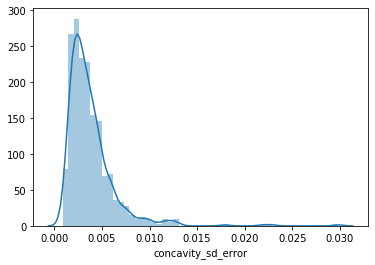

distribution of  concavity_worst
count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: concavity_worst, dtype: float64


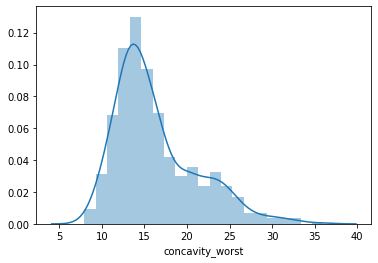

distribution of  concave_points_mean
count    569.000000
mean      25.677223
std        6.146258
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       49.540000
Name: concave_points_mean, dtype: float64


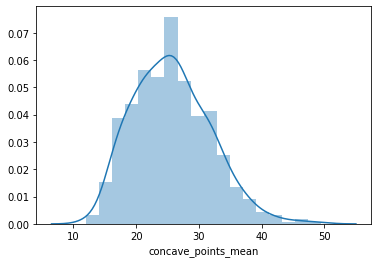

distribution of  concave_points_sd_error
count    569.000000
mean     107.261213
std       33.602542
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      251.200000
Name: concave_points_sd_error, dtype: float64


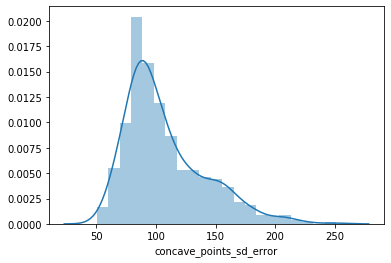

distribution of  concave_points_worst
count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: concave_points_worst, dtype: float64


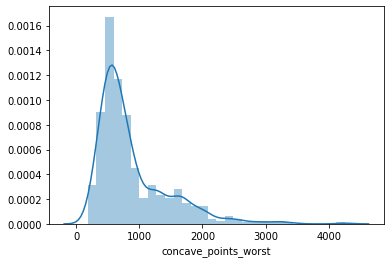

distribution of  symmetry_mean
count    569.000000
mean       0.132369
std        0.022832
min        0.071170
25%        0.116600
50%        0.131300
75%        0.146000
max        0.222600
Name: symmetry_mean, dtype: float64


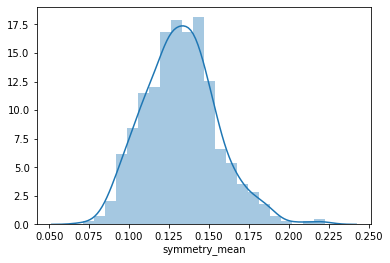

distribution of  symmetry_sd_error
count    569.000000
mean       0.254265
std        0.157336
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        1.058000
Name: symmetry_sd_error, dtype: float64


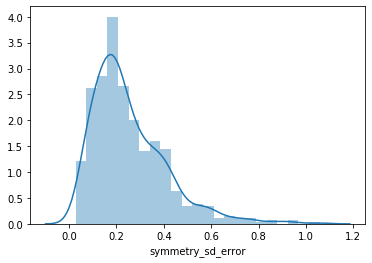

distribution of  symmetry_worst
count    569.000000
mean       0.272188
std        0.208624
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        1.252000
Name: symmetry_worst, dtype: float64


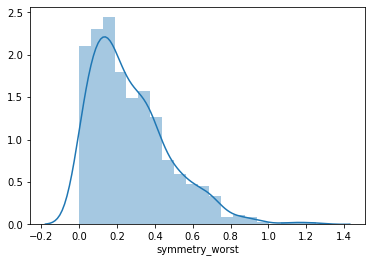

distribution of  fractal_dimension_mean
count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: fractal_dimension_mean, dtype: float64


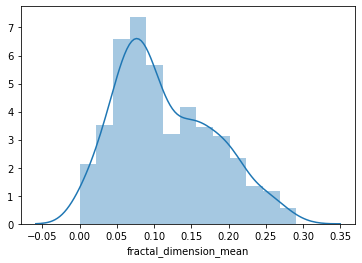

distribution of  fractal_dimension_sd_error
count    569.000000
mean       0.290076
std        0.061867
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.663800
Name: fractal_dimension_sd_error, dtype: float64


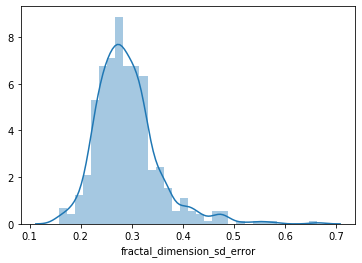

distribution of  fractal_dimension_worst
count    569.000000
mean       0.083946
std        0.018061
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.207500
Name: fractal_dimension_worst, dtype: float64


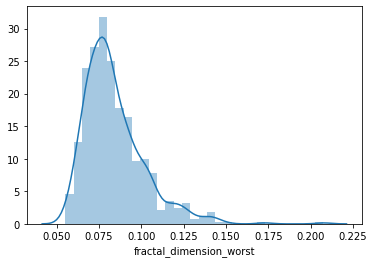

In [15]:
for i in predictors:
  print('distribution of ' , i)
  print(data[i].describe())
  sns.distplot(data.loc[np.isnan(data[i]) == 0 ,:][i])
  plt.show()


#### what we made above , we considered only float variables (predictors) having a summarized describtive statistics and having distribution plot for them to check normality

#### we see that they several of them tend to be normal with a slight skewness to right or left except 'perimeter_mean' , and 'area_sd_error'

#### so there is no urgent need for log transformation for predictors to get rid of  statistics

#### then we make correlation heatmap to check correlation

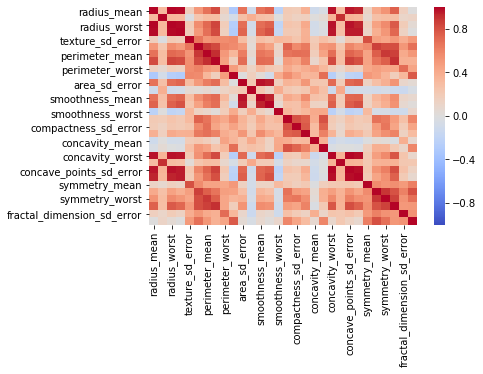

In [16]:

sns.heatmap(data.loc[: , predictors].corr(),vmin=-1 , vmax=1 , center = 0, cmap = 'coolwarm')

#### we have several dark squares , indicating that we have several correlated predictors , which we will make sure of later in modeling steps 

## Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

#### we compute mean and median of smoothness_mean , and smoothness_mean  for benign and malignant tumors 

In [17]:
data.groupby(['diagnosis'])[['smoothness_mean' , 'compactness_mean']].median()

,smoothness_mean,compactness_mean
diagnosis,,
B,1.8510,0.01631
M,3.6795,0.02859


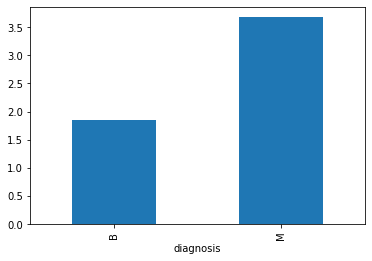

In [18]:
data.groupby(['diagnosis'])['smoothness_mean' ].median().plot(kind='bar')

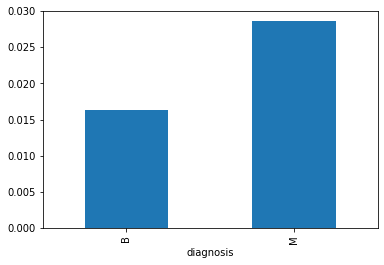

In [19]:
data.groupby(['diagnosis'])[ 'compactness_mean'].median().plot(kind='bar')

In [20]:
data.groupby(['diagnosis'])[['smoothness_mean' , 'compactness_mean']].mean()


,smoothness_mean,compactness_mean
diagnosis,,
B,2.000321,0.021438
M,4.323929,0.032281


#### we notice that both of mean and median of smoothness_mean , compactness_mean are higher in case of malignant than in case of benign tumors
#### but to be able to generalize these results on other samples and to the  whole population we have to run independent sample   t test , it is a test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.  
#### we run it for both variables between benign and malignant tumors

In [21]:
for i in ['smoothness_mean' , 'compactness_mean']:
  if data.dtypes[i] =='float64':
    print ('t-test of ' + i + ' if it differs between  benign and malignant tumor')
    print(stats.ttest_ind(data.loc[data['diagnosis']=='M',[i]],data.loc[data['diagnosis']=='B',[i]]))
    print('                ')
    print('-----------------')
     

t-test of smoothness_mean if it differs between  benign and malignant tumor
Ttest_indResult(statistic=array([15.93415802]), pvalue=array([1.65190518e-47]))
                
-----------------
t-test of compactness_mean if it differs between  benign and malignant tumor
Ttest_indResult(statistic=array([7.29707744]), pvalue=array([9.97599465e-13]))
                
-----------------


#### we have in both cases p-value less than 0.01 so we are confident by 99% that smoothness_mean and compactness_mean are higher for malignant tumor cases than benign  cases rejecting null hypothesis that they are not different

## Write a function to generate bootstrap samples of the data.


### First :we give a theoretical brief about bootstrap sampling steps
####1- we draw a sample from our population (usually with size (n) of 30-80% of population size)
####2- we have G statistic for our sample (usually mean) 
####3 - we keep drawing samples for B times 
#### 4 - usually after that , especially if B is large  the  simulated mean (mean of G statistic) and standard deviation tend to be mean of the population and distribution tends to be normal according to centrallimit theorem

### then , we write the function clarifying steps mentioned above 

In [0]:
def boot (data , n , B) :
  sample_props = []
  for _ in range(B):  #  we draw samples for B times 
    sample_ids = np.random.choice(data.index, size=n) # we  select n  cases from data (first we select n identifiers from   index column ) 
    sample=data.loc[sample_ids, :] # then we select whole cases (rows) of the selected identifiers
    i = sample.agg(lambda x:x.value_counts().index[0] if x.dtype=='object' else x.mean()).T # we will take the statistic mean for all predictors and mode for 'diagnosis' just to have the sample for all columns 
    sample_props.append( i )
  return pd.DataFrame(sample_props, columns=data.columns)



#### we will apply the function for a big enough B to validate that simulated mean and standard deviation tend to population mean and standard deviation

In [0]:
sample_props=boot (data , 200 , 10000)

#### after simulating the sample let's check how far imulated mean and standard deviation tend to population mean and standard deviation for a certain column as an example (distribution  , mean and sd of all predictors in simulated data are below)

In [0]:
# the simulated mean of the sampling distribution (for one certain column)
simulated_mean = np.mean(sample_props['smoothness_mean'])

In [0]:
# the simulated standard deviation of the sampling distribution (for one certain column)
simulated_std = np.std(sample_props['smoothness_mean'])

In [26]:
# the population mean and simulated mean
(data['smoothness_mean'].mean(), simulated_mean)

(2.8660592267135288, 2.5840192499999883)

In [27]:
# the population standard deviation and simulated standard deviation
(data['smoothness_mean'].std()/(200 ** 0.5), simulated_std)

(0.1429667065736077, 1.7578793997121818)

#### we see that with a large B of samples drawn simulated mean and standard deviation tend to population mean and standard deviation 

let's check if distributions tend to normality 

distribution of  radius_mean
count    10000.000000
mean        13.384106
std          2.687649
min          6.981000
25%         11.760000
50%         12.770000
75%         14.220000
max         28.110000
Name: radius_mean, dtype: float64


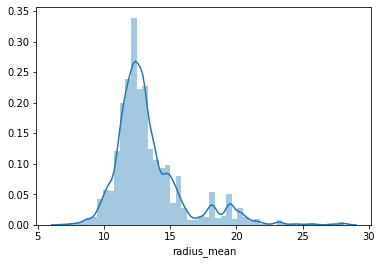

distribution of  radius_sd_error
count    10000.000000
mean        18.992955
std          3.640465
min          9.710000
25%         16.490000
50%         18.610000
75%         21.010000
max         39.280000
Name: radius_sd_error, dtype: float64


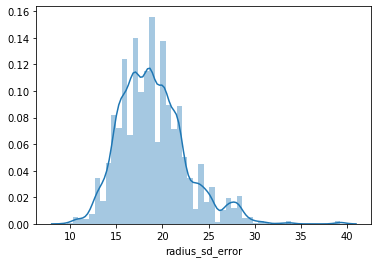

distribution of  radius_worst
count    10000.000000
mean        94.160077
std         23.971617
min         43.790000
25%         77.870000
50%         87.760000
75%        109.300000
max        188.500000
Name: radius_worst, dtype: float64


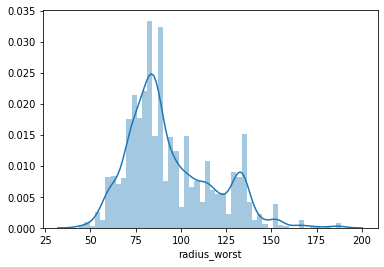

distribution of  texture_mean
count    10000.000000
mean       638.718550
std        320.075916
min        143.500000
25%        432.000000
50%        537.300000
75%        716.600000
max       2501.000000
Name: texture_mean, dtype: float64


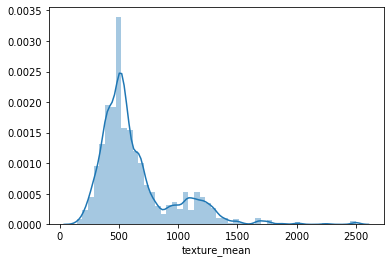

distribution of  texture_sd_error
count    10000.000000
mean         0.101671
std          0.011352
min          0.052630
25%          0.094630
50%          0.103400
75%          0.108800
max          0.163400
Name: texture_sd_error, dtype: float64


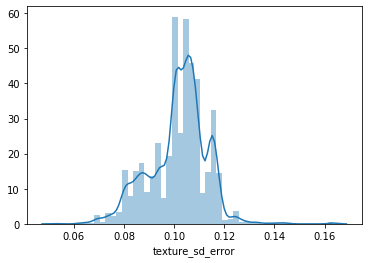

distribution of  texture_worst
count    10000.000000
mean         0.106683
std          0.049377
min          0.019380
25%          0.068650
50%          0.104700
75%          0.130400
max          0.345400
Name: texture_worst, dtype: float64


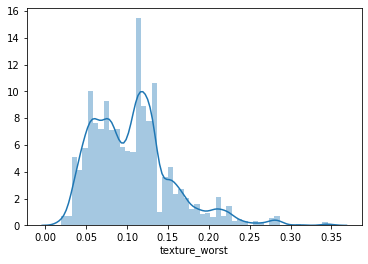

distribution of  perimeter_mean
count    10000.000000
mean         0.027469
std          0.060094
min          0.000000
25%          0.000000
50%          0.000000
75%          0.021720
max          0.426800
Name: perimeter_mean, dtype: float64


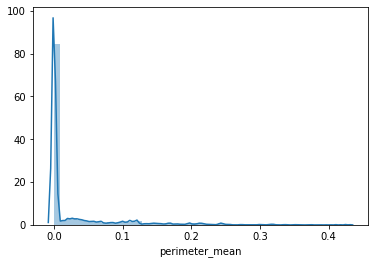

distribution of  perimeter_sd_error
count    10000.000000
mean         0.013849
std          0.030268
min          0.000000
25%          0.000000
50%          0.000000
75%          0.014060
max          0.201200
Name: perimeter_sd_error, dtype: float64


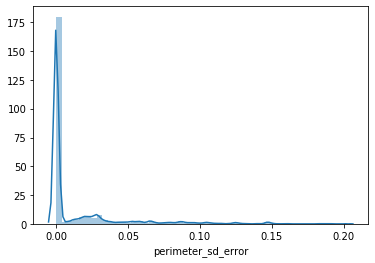

distribution of  perimeter_worst
count    10000.000000
mean         0.177170
std          0.019654
min          0.106000
25%          0.163200
50%          0.173900
75%          0.189300
max          0.304000
Name: perimeter_worst, dtype: float64


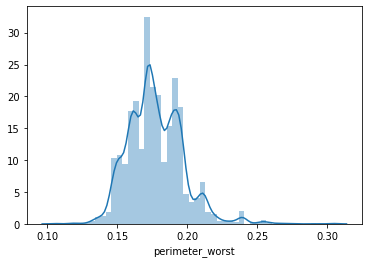

distribution of  area_mean
count    10000.000000
mean         0.061772
std          0.005972
min          0.049960
25%          0.057680
50%          0.060820
75%          0.064500
max          0.097440
Name: area_mean, dtype: float64


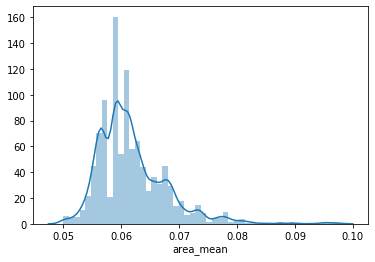

distribution of  area_sd_error
count    10000.000000
mean         0.371679
std          0.253279
min          0.111500
25%          0.223900
50%          0.295400
75%          0.422000
max          2.873000
Name: area_sd_error, dtype: float64


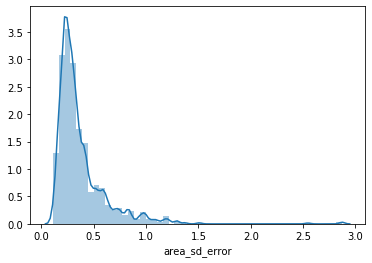

distribution of  area_worst
count    10000.000000
mean         1.206586
std          0.450932
min          0.360200
25%          0.922300
50%          1.150000
75%          1.376000
max          4.885000
Name: area_worst, dtype: float64


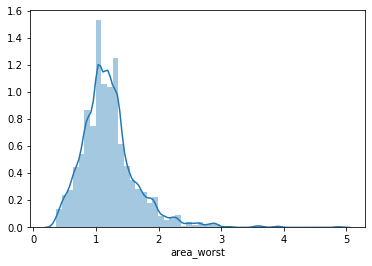

distribution of  smoothness_mean
count    10000.000000
mean         2.584019
std          1.757967
min          0.757000
25%          1.588250
50%          2.097000
75%          2.903000
max         21.980000
Name: smoothness_mean, dtype: float64


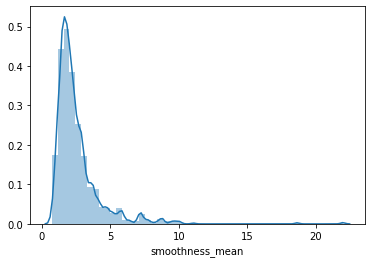

distribution of  smoothness_sd_error
count    10000.000000
mean        34.339862
std         36.871099
min          6.802000
25%         17.490000
50%         20.980000
75%         34.370000
max        542.200000
Name: smoothness_sd_error, dtype: float64


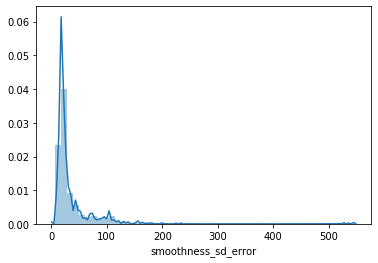

distribution of  smoothness_worst
count    10000.000000
mean         0.007128
std          0.002854
min          0.001713
25%          0.005343
50%          0.006455
75%          0.008109
max          0.031130
Name: smoothness_worst, dtype: float64


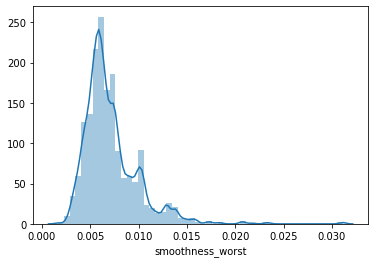

distribution of  compactness_mean
count    10000.000000
mean         0.023882
std          0.016511
min          0.002252
25%          0.013310
50%          0.018770
75%          0.030530
max          0.135400
Name: compactness_mean, dtype: float64


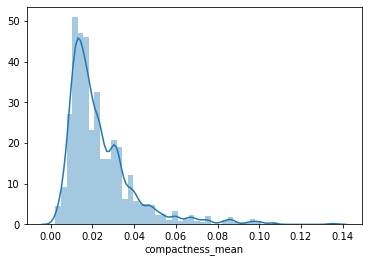

distribution of  compactness_sd_error
count    10000.000000
mean         0.008622
std          0.020294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.010510
max          0.396000
Name: compactness_sd_error, dtype: float64


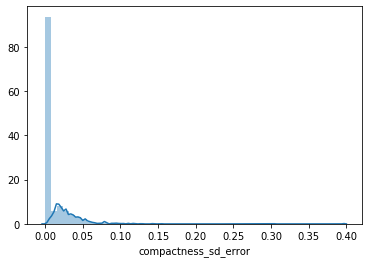

distribution of  compactness_worst
count    10000.000000
mean         0.003336
std          0.005993
min          0.000000
25%          0.000000
50%          0.000000
75%          0.006301
max          0.052790
Name: compactness_worst, dtype: float64


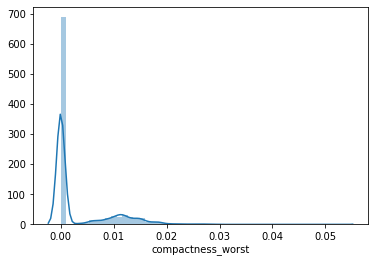

distribution of  concavity_mean
count    10000.000000
mean         0.019133
std          0.006687
min          0.007882
25%          0.015000
50%          0.018430
75%          0.020570
max          0.078950
Name: concavity_mean, dtype: float64


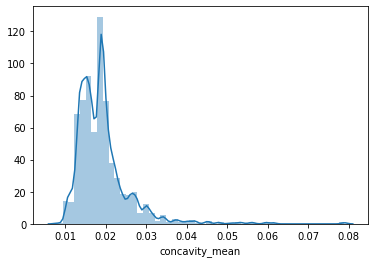

distribution of  concavity_sd_error
count    10000.000000
mean         0.003561
std          0.002295
min          0.000895
25%          0.002205
50%          0.003002
75%          0.004174
max          0.029840
Name: concavity_sd_error, dtype: float64


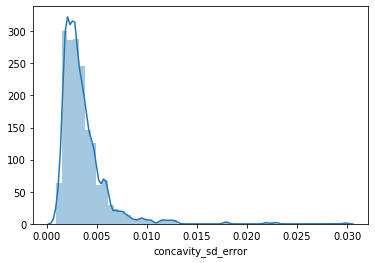

distribution of  concavity_worst
count    10000.000000
mean        15.082857
std          3.427055
min          7.930000
25%         12.980000
50%         13.900000
75%         16.220000
max         36.040000
Name: concavity_worst, dtype: float64


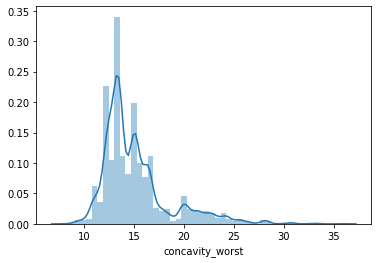

distribution of  concave_points_mean
count    10000.000000
mean        25.183730
std          5.453213
min         12.020000
25%         21.400000
50%         25.210000
75%         28.180000
max         49.540000
Name: concave_points_mean, dtype: float64


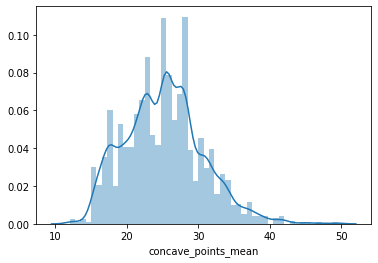

distribution of  concave_points_sd_error
count    10000.000000
mean       109.989362
std         30.884289
min         50.410000
25%         86.600000
50%        104.400000
75%        123.500000
max        251.200000
Name: concave_points_sd_error, dtype: float64


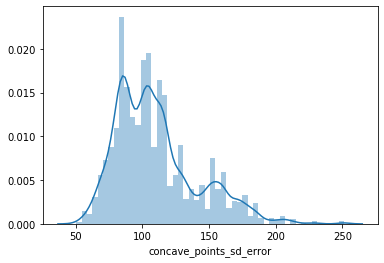

distribution of  concave_points_worst
count    10000.000000
mean       867.948840
std        528.491433
min        185.200000
25%        519.900000
50%        701.900000
75%       1044.000000
max       4254.000000
Name: concave_points_worst, dtype: float64


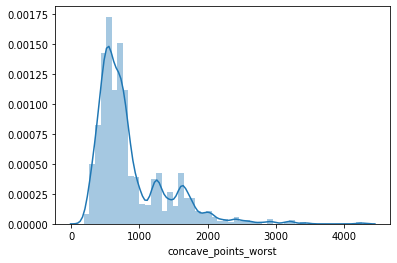

distribution of  symmetry_mean
count    10000.000000
mean         0.131318
std          0.015127
min          0.081250
25%          0.122200
50%          0.129800
75%          0.141300
max          0.222600
Name: symmetry_mean, dtype: float64


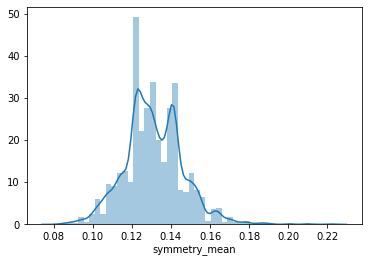

distribution of  symmetry_sd_error
count    10000.000000
mean         0.243389
std          0.141361
min          0.027290
25%          0.148600
50%          0.203100
75%          0.317200
max          1.058000
Name: symmetry_sd_error, dtype: float64


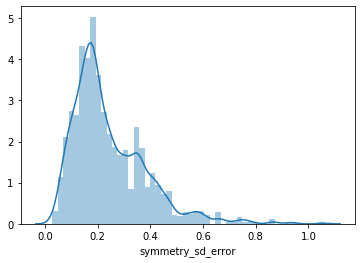

distribution of  symmetry_worst
count    10000.000000
mean         0.089069
std          0.170196
min          0.000000
25%          0.000000
50%          0.000000
75%          0.134600
max          1.252000
Name: symmetry_worst, dtype: float64


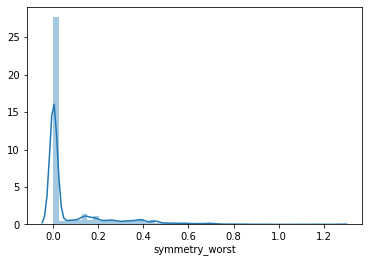

distribution of  fractal_dimension_mean
count    10000.000000
mean         0.036243
std          0.061241
min          0.000000
25%          0.000000
50%          0.000000
75%          0.062960
max          0.291000
Name: fractal_dimension_mean, dtype: float64


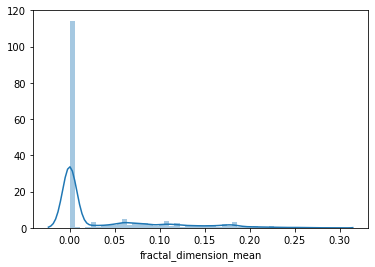

distribution of  fractal_dimension_sd_error
count    10000.000000
mean         0.284572
std          0.050919
min          0.156500
25%          0.250000
50%          0.282700
75%          0.310900
max          0.663800
Name: fractal_dimension_sd_error, dtype: float64


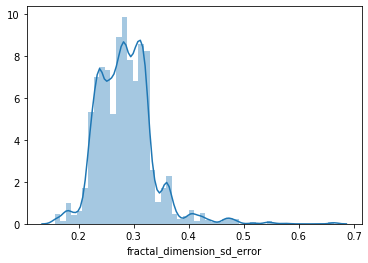

distribution of  fractal_dimension_worst
count    10000.000000
mean         0.084501
std          0.017622
min          0.055040
25%          0.072380
50%          0.080090
75%          0.091800
max          0.207500
Name: fractal_dimension_worst, dtype: float64


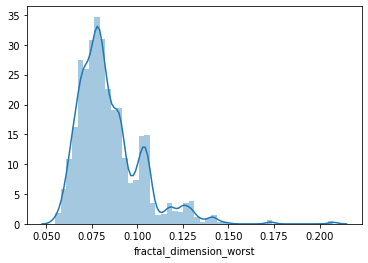

In [28]:
for i in predictors:
  print('distribution of ' , i)
  print(sample_props[i].describe())
  sns.distplot(sample_props.loc[np.isnan(sample_props[i]) == 0 ,:][i])
  plt.show()


### we find that distributions of all columns are almost normal with large enough B (here not all variables close to normality since we need larger B than 10000 but due to computer performance )  and also if we check simulated  mean and standard deviation for all columns (not just 'smoothness_mean') we see that they tend to population ones 

## Modeling
## Build a model to predict the malignant tumors.

#### first : we make our dependent column numeric as   binary column 

In [0]:
data['Mal']=(data['diagnosis']== 'M')*1

##  Identify 2-3 variables that are predictive of a malignant tumor.


### we have several ways to choose most important predictors 

#### 1-as a basic step we check correlation coeffecient between 'Mal' (the column we generated that takes 0 if baneign and 1 if malignant) and all predictors and take correlation coeffecient , 

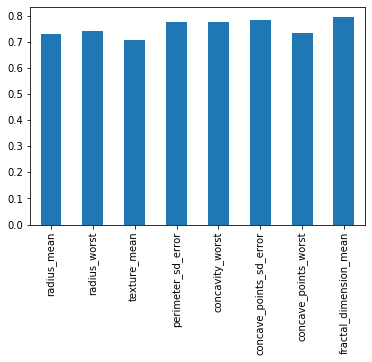

In [30]:
data.corr()['Mal'] [(abs(data.corr()['Mal']) > 0.7) & (abs(data.corr()['Mal']) <1)].plot(kind='bar')

#### here we have 8 features with a powerful correlation coeffecient with malignant tumor (means that rhe higher these variables value , the higher the probability of a tumor to be malignant)

#### 2 -regarding identifying predictors , we have several columns , as a choosing step , we run a significance test to check if each variable significantly differs between malignant , and benign tumor cases , with a significance level of 0.01 

In [0]:
columns = data.columns[2:32]
predictors=[]


for i in columns :
   if pd.Series(stats.ttest_ind(data.loc[data['diagnosis']=='M',[i]],data.loc[data['diagnosis']=='B',[i]]))[1][0] < 0.01 : 
      predictors.append(i)
   else:
      continue


In [32]:
len(predictors)

25

#### Now we have 25 column , that are significantly differeing between malignant and benign

#### 3 - we try PCA Principal component analysis which is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components

#### We run it here on predictors to see variables that are most effective (i.e in our case we can run model only on these most effective features without much loss in fitting)

#### we extract 3 components and see variables that have the highest loadings on the component that explaines the highest percentage of variance 

In [33]:
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(data.loc[: , predictors])
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)


Explained Variance: [0.98204533 0.0161765  0.00155745]


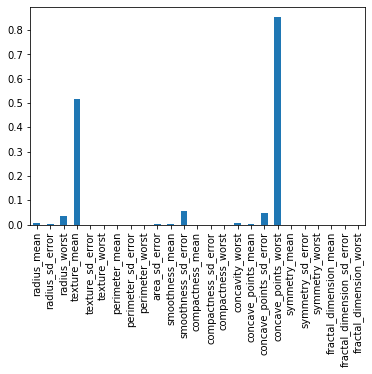

In [34]:
pd.Series ((fit.components_)[0] , index=predictors).plot(kind='bar')

#### we find that the variables that have the highest loadings of the first component (that explaines more than 98% of variance in data) are (texture mean & convance points worst) despite we have 8 variables that are correlated with M tumor ( this indicates collinearity and our need to feature selection to avoid overfitting as we will see later)
 

In [35]:
 data.loc[:,['texture_mean','Mal']].corr()

,texture_mean,Mal
texture_mean,1.000000,0.708984
Mal,0.708984,1.000000


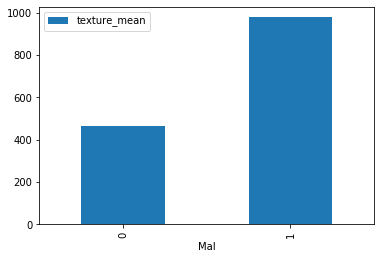

In [36]:
data.loc[:,['Mal','texture_mean']].groupby('Mal').mean().plot(kind='bar')


#### Here we notice that average of texture mean is higher in case of malignant tumor 





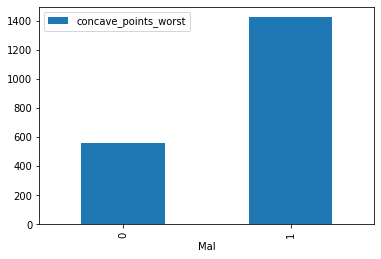

In [37]:
data.loc[:,['Mal','concave_points_worst']].groupby('Mal').mean().plot(kind='bar')


#### convance worst point average  Here we notice that convance worst point averageis higher in case of malignant tumor (i.e convance worst point average is lower in case of benign tumor

## Modeling

### Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.


#### we will use Extra trees classifier and XBG classifier , below a brief comparison between them 

 #### extremely randomized trees is quite similar to random forest .Both  are bagging methods aggregating some fully grow decision trees. RF will only try to split by e.g. a third of features, but evaluate any possible break point within these features and pick the best. However, ET will only evaluate a random few break points and pick the best of these so we get the best solution faster . ET can bootstrap samples to each tree or use all samples

#### xgboost is an implementation of gradient boosting and can work with decision trees, typical smaller trees. Each tree is trained to correct the residuals of previous trained trees. Gradient boosting can be more difficult to train, but can achieve a lower model bias than RF. For noisy data bagging is likely to be most promising. For low noise and complex data structures boosting is likely to be most promising , but it takes more time to find the best combinations of parameters to achieve the best fitting

### Identify how you would control for overfitting in each classification technique.


#### a basic step to avoid overfitting is features selection 

#### we run an extra tree classifier on the whole data with a small n_estimators  to know what basically are the most importent features 

In [38]:
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(data.loc[: , predictors] ,  data['Mal'])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

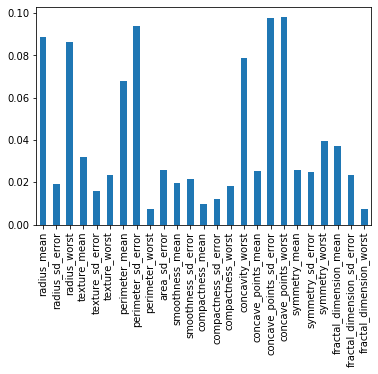

In [39]:
pd.Series(clf.feature_importances_ , index=predictors).plot(kind='bar')

#### we choose features that have feature importance > 0.05

In [40]:
pd.Series(clf.feature_importances_ , index=predictors)[clf.feature_importances_ > 0.05]

radius_mean                0.088621
radius_worst               0.086168
perimeter_mean             0.068082
perimeter_sd_error         0.094088
concavity_worst            0.078638
concave_points_sd_error    0.097824
concave_points_worst       0.097960
dtype: float64

#### we notice absence of texture mean here from most important features despite its high correlation with malignant tumor cases and it was the variable with highest loading on the most variance explaining principle component , this is because it is highly correlated with radius mean as clear in correlation heatmap above in exploratort analysis

In [0]:
predictors1=pd.Series(clf.feature_importances_ , index=predictors)[clf.feature_importances_ > 0.05].index

#### also to avoid overfitting we use crossvalidation , with a test size of 35% which is higher than default , also we use gridsearch to reach the best fitting

#### we start by training and fitting extra trees classifier 

In [0]:
# Organize our data for training
X =  data.loc[: , predictors1]
Y = data['Mal'] 
X, X_Val, Y, Y_Val = train_test_split(X, Y ,test_size=0.35)

In [43]:

params = {'min_samples_split':[2,3,4],   'min_samples_leaf': [1, 2, 3,4] ,
 'max_depth': [3,4,5,6,7 , None ] ,'n_estimators' : [100,500,1000]}

model = ExtraTreesClassifier()
grid = GridSearchCV(model, params)
grid.fit(X, Y)



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 

### Evaluate the performance of each model.


#### to evaluate model , we use AUC - ROC curve to evaluate model performance on test set . It is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model.

#### we also use accuracy score whiich is simply Number of correct predictions / total number of tesrt set 

In [44]:

# Print the AUC  score
print(roc_auc_score(Y_Val, grid.best_estimator_.predict(X_Val))) 
# Print the accuracy  score
print(accuracy_score(Y_Val, grid.best_estimator_.predict(X_Val))) 

0.9505517826825127
0.945


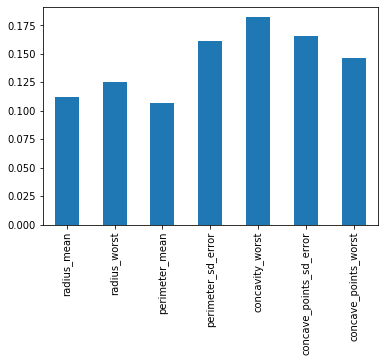

In [45]:
pd.Series(grid.best_estimator_.feature_importances_ , index=predictors1).plot(kind='bar')

### then we perform same steps with xgb classifier
#### we have here an extra method to avoid overfitting which is regularisation
#### we have gamma  which adds penalty on number of leaves of a tree.

In [0]:
# Organize our data for training
X =  data.loc[: , predictors1]
Y = data['Mal']
X, X_Val, Y, Y_Val = train_test_split(X, Y, test_size=0.35)

In [47]:
# A parameter grid for XGBoost
params = {'min_child_weight':[3,4], 'gamma':[i/10.0 for i in [2,3]],  'subsample':[i/10.0 for i in range(3,6)],'learning_rate': [ 0.001, 0.01, 0.1] ,
'colsample_bytree':[i/10.0 for i in range(3,8)], 'max_depth': [3,4,5] ,'n_estimators' : [100,500,1000]}

# Initialize XGB and GridSearch
xgb = XGBClassifier(nthread=-1 ) 

grid = GridSearchCV(xgb, params)
grid.fit(X, Y)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=-1, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, re...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'gamma': [0.2, 0.3],
                         'learning_rate': [0.001, 0.01

In [48]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1)

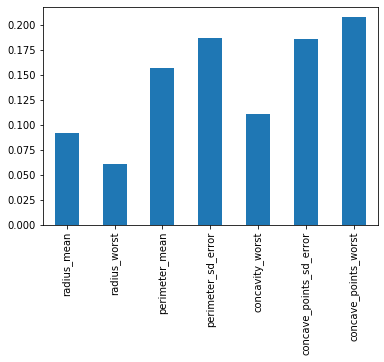

In [49]:
pd.Series(grid.best_estimator_.feature_importances_ , index=predictors1).plot(kind='bar')

In [50]:


# Print the AUC  score
print(roc_auc_score(Y_Val, grid.best_estimator_.predict(X_Val))) 
# Print the accuracy  score
print(accuracy_score(Y_Val, grid.best_estimator_.predict(X_Val))) 

0.9352820623449466
0.94
